In [1]:
# from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기



In [3]:
perch_length=np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
        21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
        22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
        27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
        36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
        40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array(
        [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
        110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
        130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
        197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
        514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
        820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
        1000.0, 1000.0]
)

In [4]:
train_input,test_input,train_target,test_target=train_test_split(
    perch_length,perch_weight,random_state=40
)
train_input

array([15. , 28. , 22.5, 21. , 30. , 40. , 34.5, 43. , 28.7, 22. , 18. ,
       21.3, 39. , 22. , 23.5, 40. , 36. , 37. , 16.2, 23. , 39. , 25.6,
       22. , 22. , 27.3, 19.6, 37. , 27.5, 20. , 43.5, 40. , 21. , 27.5,
       22.5, 43. , 21. , 13.7, 40. , 32.8, 19. , 25. , 18.7])

In [8]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [9]:
# knn
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)


KNeighborsRegressor(n_neighbors=3)

In [19]:
df=pd.DataFrame([perch_length,perch_weight])
df =df.T
df


,0,1
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0
5,18.0,100.0
6,18.7,78.0
7,19.0,80.0
8,19.6,85.0
9,20.0,85.0


In [22]:
knr.predict([[50]])

array([1033.33333333])

In [27]:
distances,indexs = knr.kneighbors([[50]])
indexs

array([[29, 34,  7]], dtype=int64)

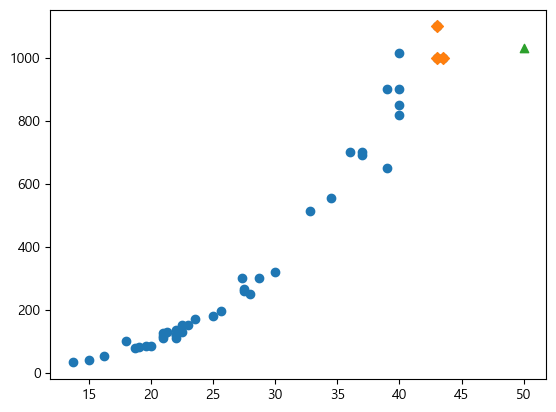

In [36]:
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexs],train_target[indexs],marker='D')
plt.scatter(50,1033,marker='^')

In [38]:
distances,indexs = knr.kneighbors([[30]])
indexs

array([[4, 8, 1]], dtype=int64)

In [39]:
# knn회귀의 단점은 훈련세트가 없는 것은 데이터 예측이 제대로안된다..
knr.predict([[30]])

array([290.])

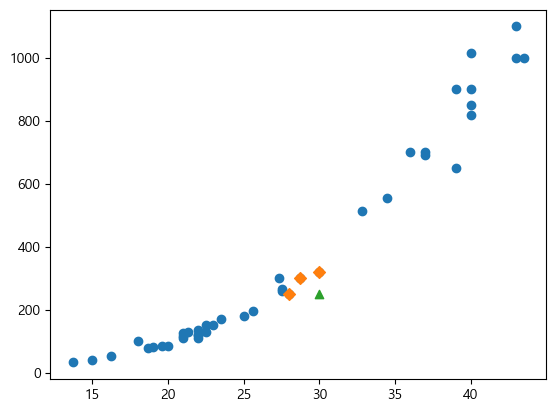

In [40]:
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexs],train_target[indexs],marker='D')
plt.scatter(30,250,marker='^')

In [20]:
# 예측하기
predict = knr.predict(test_input)
print("예측 : ",predict)

예측 :  [ 648.66666667  166.66666667 1033.33333333  143.33333333  855.
  121.66666667  696.66666667   76.5         254.         1033.33333333
   41.16666667  166.66666667  182.33333333  275.        ]


In [21]:
# 예측률
score = knr.score(test_input,test_target)
print("예측률 : ",score*100,'%')

예측률 :  97.32558557553331 %


선형회귀

In [42]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [49]:
#위에서 훈련하면 밑으로 y절편과 기울기를 던져준다..
# lr.coef_  :기울기 , lr.intercept_ : y절편
print(lr.coef_ , lr.intercept_)

[37.39893705] -669.3670965266626


In [47]:
# 농어 50cm ,무게 1500g 
# knr - 1033g 으로 예측됨  // lr -1241g 으로 예측
# 선을 그려서 예측을 한다.
predict = lr.predict([[50]])
predict

array([1200.57975618])

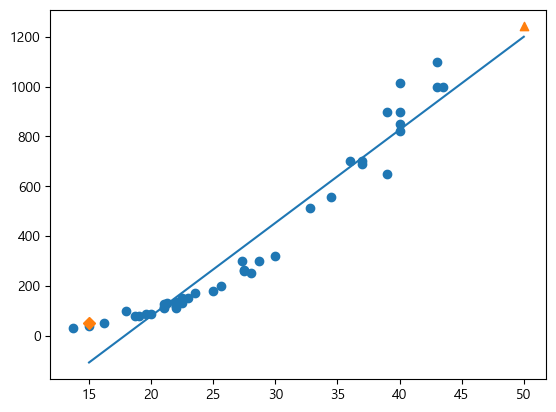

In [61]:
plt.scatter(train_input,train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.plot(15,50,marker='D')
plt.scatter(50,1241.8,marker='^')